In [1]:
from fastai.vision import *
import torch
torch.cuda.set_device(0)

In [2]:
path = untar_data(URLs.IMAGENETTE)

In [3]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train = 'train', valid = 'val', bs = 32, size = 224, ds_tfms = tfms).normalize(imagenet_stats)

In [ ]:
data.show_batch()

In [4]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy, pretrained = True)
learn.unfreeze()
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


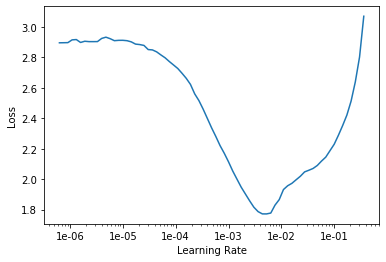

In [5]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(30, max_lr = 1e-3, callbacks=[callbacks.SaveModelCallback(learn, monitor = 'accuracy', mode = 'max')])

In [16]:
learn.save('resnet50_imagenette_bs32')

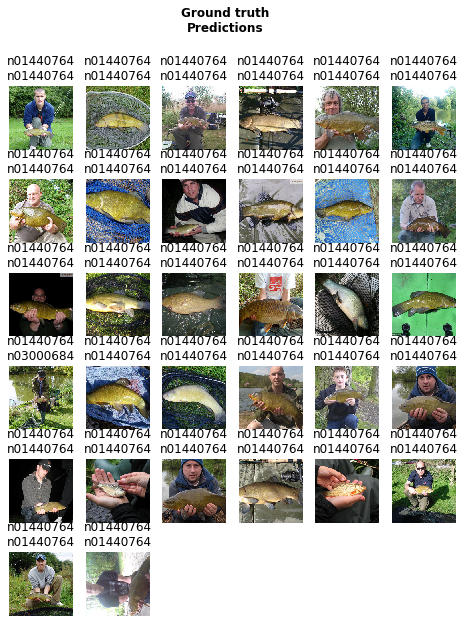

In [11]:
learn = cnn_learner(data, models.resnet50, metrics = accuracy, pretrained = True)
learn.load('resnet50_imagenette_bs32')
learn.show_results(ds_type=DatasetType.Valid, rows=6, figsize=(8,10))